# Data Exploration: Permuted MNIST

## 1. Introduction

This notebook performs a preliminary analysis of the Permuted MNIST dataset. The goal is to understand the structure, scale, and visual characteristics of the data before developing advanced machine learning agents.

## 2. Setup and Data Loading

We use `sklearn.datasets` to fetch the MNIST data, which serves as the base for the Permuted MNIST competition.

In [4]:
# CODE CELL 1: Setup and Data Loading (FIXED)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Set a random seed for reproducibility
np.random.seed(42)

try:
    print("Loading MNIST (784 features)...")
    # Setting as_frame=False ensures mn.data and mn.target are NumPy arrays.
    mn = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False)

    # FIX: Access the data directly as NumPy arrays (no .values needed)
    X = mn.data.astype(np.float32)
    y = mn.target.astype(np.int64) # .target is already a NumPy array/Series depending on scikit-learn version

    # Reshape features from (N, 784) to (N, 28, 28) for visualization
    X_images = X.reshape(-1, 28, 28)

    print(f"Data Loaded: Total Samples = {X.shape[0]}, Feature Dimension = {X.shape[1]}")

except Exception as e:
    print(f"Error loading data: {e}")
    X, y, X_images = None, None, None

Loading MNIST (784 features)...
Data Loaded: Total Samples = 70000, Feature Dimension = 784


## 3. Basic Data Statistics

We examine the distribution of classes and the range of pixel values.

--- Class Distribution (Total Samples) ---
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


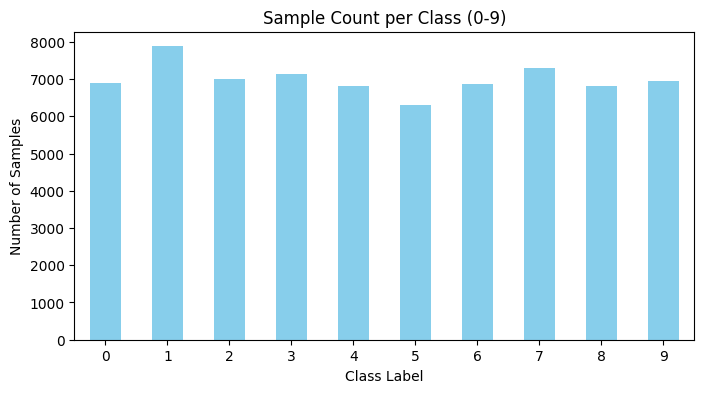


--- Pixel Value Statistics (Raw Data, 0-255) ---
Global Mean Pixel Value: 33.39
Global Std Dev: 78.65
Min Pixel Value: 0.0
Max Pixel Value: 255.0


In [5]:
# CODE CELL 2: Basic Statistics and Class Distribution

if X is not None:
    # --- Class Distribution ---
    class_counts = pd.Series(y).value_counts().sort_index()

    print("--- Class Distribution (Total Samples) ---")
    print(class_counts)

    plt.figure(figsize=(8, 4))
    class_counts.plot(kind='bar', color='skyblue')
    plt.title('Sample Count per Class (0-9)')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=0)
    plt.show()

    # --- Pixel Value Statistics ---
    print("\n--- Pixel Value Statistics (Raw Data, 0-255) ---")

    # Calculate statistics across all pixels of all samples
    pixel_mean = X.mean()
    pixel_std = X.std()
    pixel_min = X.min()
    pixel_max = X.max()

    print(f"Global Mean Pixel Value: {pixel_mean:.2f}")
    print(f"Global Std Dev: {pixel_std:.2f}")
    print(f"Min Pixel Value: {pixel_min}")
    print(f"Max Pixel Value: {pixel_max}")

else:
    print("Cannot perform statistics: Data not loaded.")

## 4. Visualization of Samples

We visualize a grid of random samples to confirm data integrity and format. Since the competition uses Permuted MNIST, we acknowledge the pixels will be shuffled in the final competition environment, but the underlying images remain the same.

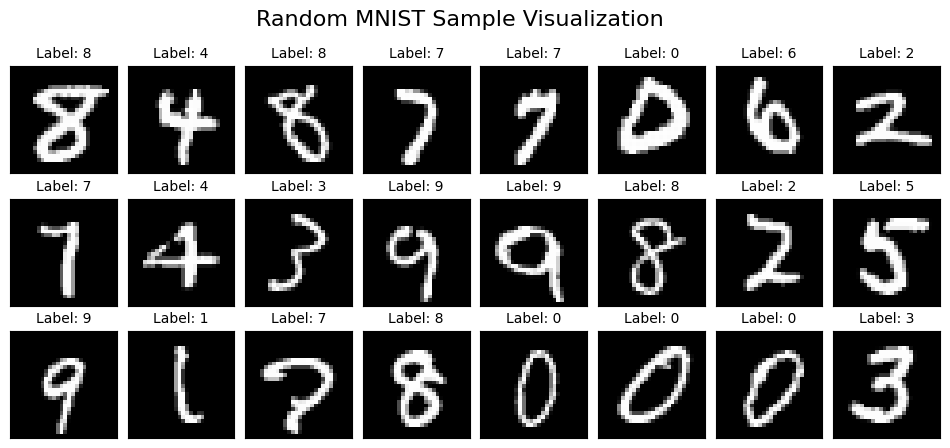

In [6]:
# CODE CELL 3: Visualize Random Samples

if X_images is not None:
    fig, axes = plt.subplots(3, 8, figsize=(12, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    # Select 24 random indices
    indices = np.random.choice(X.shape[0], size=24, replace=False)

    for i, ax in enumerate(axes.flat):
        if i < len(indices):
            idx = indices[i]
            # Display image and label
            ax.imshow(X_images[idx], cmap='gray')
            ax.set_title(f"Label: {y[idx]}", fontsize=10)

    plt.suptitle("Random MNIST Sample Visualization", fontsize=16)
    plt.show()
else:
    print("Cannot visualize: Image data not available.")